# 👨‍💻 Análise, Limpeza e Predição de Dados - Mudança de emprego para Cientistas de dados 👩‍💻

**SUMÁRIO:**

1. Importação das bibliotecas;
2. Importação do dataset;
3. Observações iniciais;
4. Limpando dados;
5. Analisando dados;
6. Conclusões da análise;
7. Predições;
8. Métricas;
9. Conclusões finais.


As informações do dataset podem ser vistas a seguir:

**INFORMAÇÕES DO DATASET:**


* **enrollee_id**: ID exclusivo para o candidato
* **city**: Código da cidade
* **city_ development _index**: Índice de desenvolvimento da cidade (em escala)
* **gender**: Gênero do candidato
* **relevent_experience**: Experiência relevante do candidato
* **enrolled_university**: Tipo de curso universitário matriculado, se houver
* **education_level**: Nível de educação do candidato
* **major_discipline**: Major principal de educação do candidato
> * STEM: Science, Technology, Engineering, and Math Degree
> * Business Major: Administração de negócios
> * Humanities: Humanidades
> * Arts: Artes
> * No major: Não faz/possui um major
> * Other: Outro
* **experience**: Experiência total do candidato em anos
* **company_size**: Nº de funcionários na empresa do empregador atual
* **company_type**: Tipo de empregador atual
* **last_new_job**: Diferença em anos entre o emprego anterior e o emprego atual
* **training_hours**: Horas de treinamento concluidas
* **target**: 0 - Não está procurando uma mudança de emprego ou 1 - Procurando
uma mudança de emprego

#1. Importação das bibliotecas

Antes de começarmos a trabalhar, precisamos importar as bibliotecas básica, para visualização e para os modelos de predição:

In [1]:
#operações básicas
import numpy as np
import pandas as pd

#para visualização
import matplotlib.pyplot as plt
import seaborn as sns

#para os modelos de predição
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import LogisticRegression

#2. Importação dos datasets

Em seguida, devemos importar o nosso dataset:

In [2]:
df = pd.read_csv("train.csv") 

#3. Observações iniciais

Para conhecermos um pouco o estilo do nosso dataset, podemos ver suas primeiras linhas:

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


Também devemos ver como estão as informações ao longo do dataset, para termos uma noção inicial do que deverá ser tratado:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Como observações iniciais, temos que:

*   Existem 19158 entradas, mas em algumas features, o número não é esse, o que retrata a existência de dados faltantes;
*   Possuímos 10 colunas com dados categóricos e 4 com dados númericos; esta divisão está correta de acordo com as features. 



#4. Limpando dados

## Retirando linhas duplicadas

A primeira análise que devemos ter ao olhar o dataset é vermos se ele possui linhas duplicadas:

In [5]:
df[df.duplicated()]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


Com isso, verificamos que não há linhas duplicadas, portanto, devemos seguir para a verificação de cada feature com dados faltantes.

## Verificação e limpeza das colunas com dados faltantes

Podemos começar pela coluna "gender":

In [6]:
df['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

Percebemos que os dados estão categorizados corretamente, o problema é que existem muitos dados faltantes. Antes de decidirmos como os trataremos, podemos verificar as próximas features, seguindo por "enrolled_university":

In [7]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

Verificaremos, agora, "education_level":



In [8]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

Em seguida, verificaremos "major_discipline":

In [9]:
df['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

A próxima feature a ser verificada é "experience":

In [10]:
df['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

Em seguida, "company_size":

In [11]:
df['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

Verificaremos, também, os dados de "company_type":

In [12]:
df['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

Por fim, "last_new_job":

In [13]:
df['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

Com isso, concluímos que todas as colunas possui os dados em categorias e valores que não são discrepantes, no entanto, o maior problema é a grande quantidade de dados faltantes. Para não removermos grande parte do dataset, seguiremos a construção do modelo com os valores faltantes; caso seja necessário, apagaremo-nos (o que reduziria muito o dataset).

# 5. Analisandos dados

## Adotando definições iniciais:

Antes de começarmos as análises, podemos definir a palheta de cores e o estilo dos gráficos:

In [14]:
#Definindo a nossa palheta de cores:
sns.set_palette('hsv_r')

#Definindo o nosso estilo para o fundo dos gráficos:
sns.set_style('darkgrid')

## Análises ao longo das features

Podemos começar nossa análise verificando se os dados em questão refletem uma distribuição igualitária entre os gêneros:

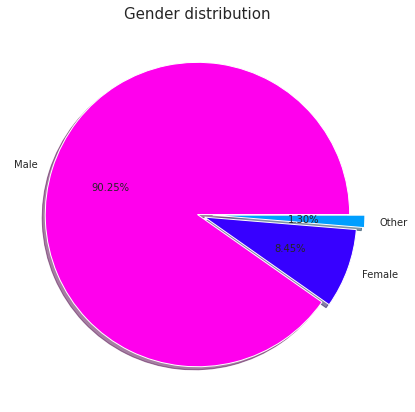

In [15]:
labels = df['gender'].value_counts().index
sizes = df['gender'].value_counts().values
explode = [0,0.05, 0.1]

plt.figure(figsize = (7,7))
plt.pie(sizes, labels = labels, explode = explode, shadow = True, autopct = '%1.2f%%')
plt.title('Gender distribution', fontsize = 15)
plt.show()

Com isso, percebemos que, majoritariamente, o dataset representa a população masculina.

Podemos, então, questionar se a distribuição dos gêneros é relacionada à experiência relevante dos candidatos:

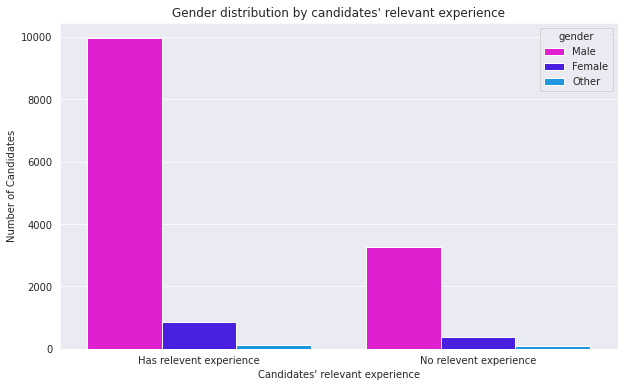

In [16]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'relevent_experience', data = df, hue = 'gender')
plt.ylabel('Number of Candidates')
plt.xlabel("Candidates' relevant experience")
plt.title("Gender distribution by candidates' relevant experience")
plt.show()

Percebemos, então, que a maioria dos candidatos possui experiência relevante: o fator "gênero" não influencia tanto essa questão, pois todos os gêneros possuem mais experiência relevante. 

Questionaremos agora como os candidatos estão distribuídos em relação ao curso universitário matriculado:

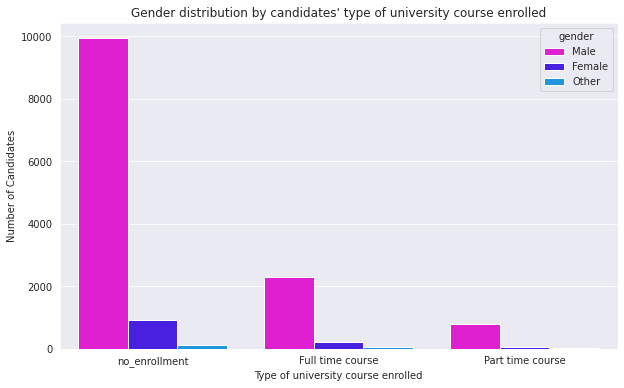

In [17]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'enrolled_university', data = df, hue = 'gender')
plt.ylabel('Number of Candidates')
plt.xlabel('Type of university course enrolled')
plt.title("Gender distribution by candidates' type of university course enrolled")
plt.show()

Percebemos, então, que a maioria dos candidatos estão localizados na categoria de "no_enrollment", que reflete o fator de não estarem matriculados em um curso universitário. Uma questão que pode ser levantada em uma pesquisa futura da empresa é: esse fator se deve aos candidatos já possuírem um curso universitário, ou ainda não ingressaram em nenhum?

Um fator que é possível ser visto é a grande quantidade de homens, o que já foi explicitado acima, o que não deixa clara a análise em relação aos demais gêneros. Por isso, faremos uma análise específica para não-homens:

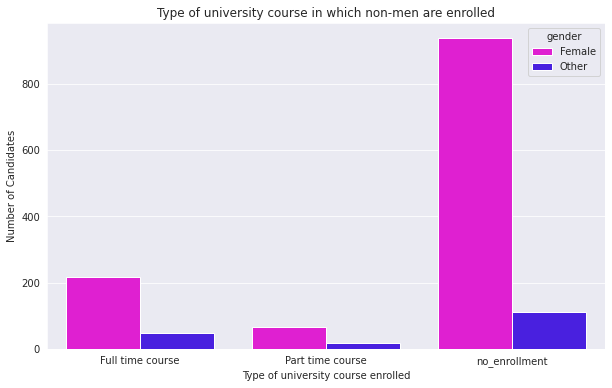

In [18]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'enrolled_university', data = df[df['gender'] != 'Male'], hue = 'gender')
plt.ylabel('Number of Candidates')
plt.xlabel('Type of university course enrolled')
plt.title("Type of university course in which non-men are enrolled")
plt.show()

Percebemos, então, que as tendências dos outros gêneros além do masculino seguem a mesma tendência deste. Fator que é interessante pontuarmos é que classificades em "Other" possuem uma proporção menor de não-matriculades para matriculades em curso de tempo integral, quando analisades em relação a homens e mulheres, o que reflete um avanço em relação à inclusão dessas pessoas em ambientes majoritariamente ocupados por homens. 


Voltando à análise com todos os candidatos, podemos ver sua distribuição relacionada ao nível de educação:

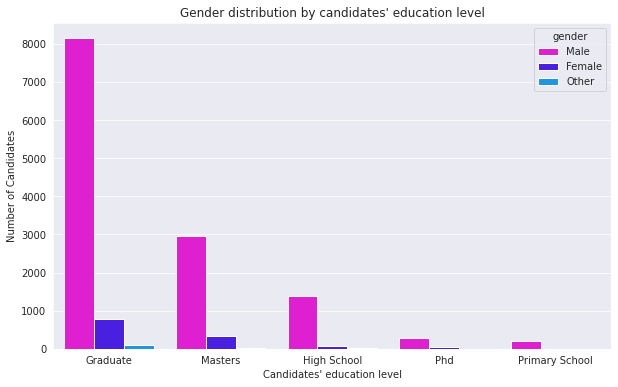

In [19]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'education_level', data = df, hue = 'gender')
plt.ylabel('Number of Candidates')
plt.xlabel("Candidates' education level")
plt.title("Gender distribution by candidates' education level")
plt.show()

Percebemos, então, que a maioria dos candidatos é matriculada em cursos de graduação, seguido de pós-graduandos e, em seguida, Ensino Médio. Fator interessante de se pontuar também é que possuem mais pessoas com Ensino Médio apenas do que pessoas com Phd, o que reflete uma maior atenção das empresas em relação ao fato de o candidato saber trabalhar, diferentemente de ramos empregatícios tradicionais, que se preocupam excessivamente com o academicismo. 

Nossa próxima questão diz respeito à distribuição dos candidatos por grande área de educação:

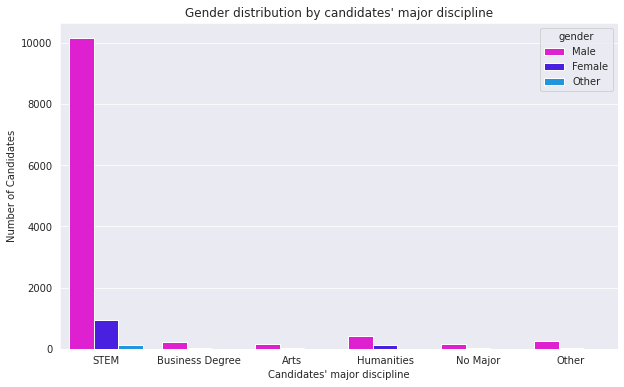

In [20]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'major_discipline', data = df, hue = 'gender')
plt.ylabel('Number of Candidates')
plt.xlabel("Candidates' major discipline")
plt.title("Gender distribution by candidates' major discipline")
plt.show()

Concluímos que a área de STEM abrange grande parte dos candidatos em análise, haja visto que são cientistas de dados, o que reflete uma falta de inclusão destes em outros setores. No entanto, a segunda maior grande área com candidatos é a de Humanidades, o que reflete a necessidade destes profissionais nesses outros setores.

Em seguida, podemos ver a distribuição dos candidatos, relacionando seus gêneros aos índices de desenvolvimento das cidades me que estão encaixados:

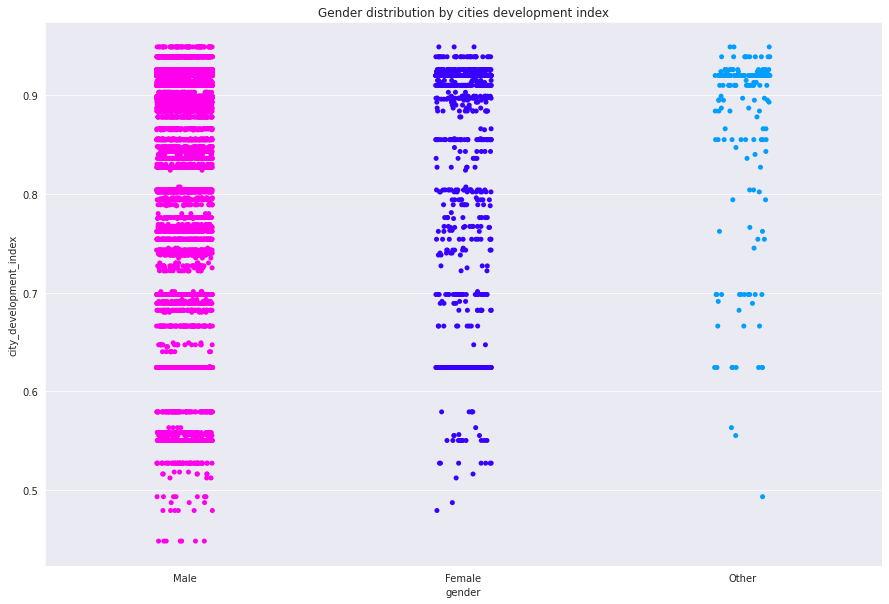

In [21]:
plt.figure(figsize = (15,10))
sns.stripplot(x = 'gender', y = 'city_development_index', data = df)
plt.title("Gender distribution by cities development index")
plt.show()

Percebemos, então, que a maior concentração de pessoas do gênero feminino, ou englobados com "Other" é mais restrita a cidades com índice de desenvolvimento alto. Por mais que a concentração de homens também esteja nestas cidades, eles apresentam também relevante concentração em cidades com outros índices. Com isso, podemos perceber que os avanços das conquistas femininas e dos outros gêneros (além do masculino) vêm diminuindo a acentuada diferença da participação destes em papéis importantes, como o de cientista de dados. 

Nossa próxima análise diz respeito à distribuição do tipo da companhia relacionado ao seu tamanho:

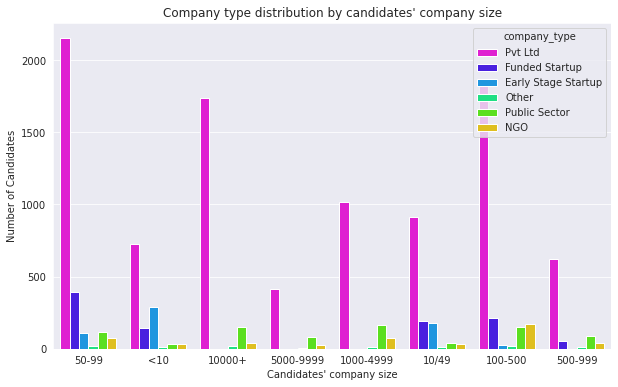

In [22]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'company_size', data = df, hue = 'company_type')
plt.ylabel('Number of Candidates')
plt.xlabel("Candidates' company size")
plt.title("Company type distribution by candidates' company size")
plt.show()

Com isso, percebemos que candidatos se concentram em Sociedades Limitadas (Pvt Ltd); sua distribuição em relação ao tamanho da empresa é arbitrária, haja visto que a maior concentração estão em faixas como 50-99 e 10000+. Uma análise que podemos fazer diz respeito às companhias caracterizadas Startups (Funded startup e Early Stage Startup), já que concentram seus candidatos em companhias de menor tamanho. Companhias do Setor Público (Public Sector) estão presentes em companhias de todos os tipos, mas são mais expressivas em companhias maiores (acima de 49 funcionários). Por sua vez, ONGs (NGO) concentram seus candidatos em companhias de tamanho médio (entre 100 e 4999 funcionários). 

A análise a seguir diz respeito à distribuição de gêneros relacionada ao tipo de cada companhia:

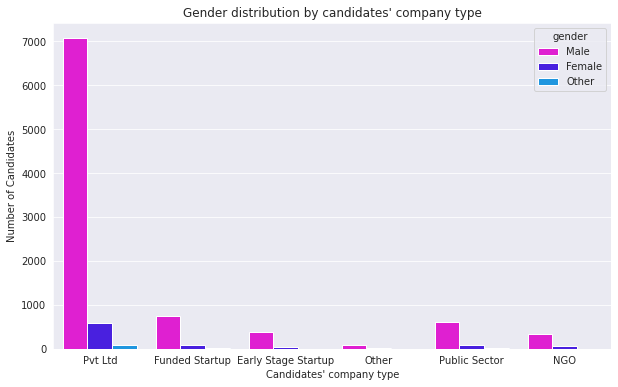

In [23]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'company_type', data = df, hue = 'gender')
plt.ylabel('Number of Candidates')
plt.xlabel("Candidates' company type")
plt.title("Gender distribution by candidates' company type")
plt.show()

Acompanhando as outras análises que fizemos, nesta também há desigualdade de gênero: grande parte das mulheres e outros gêneros além do masculino são localizados em Sociedades Limitadas (Pvt Ltd). No entanto, neste caso, a parcela masculina também é extremamente concentrada neste tipo de companhia, o que reflete a necessidade de, além de uma maior diversidade de gênero, uma maior diversidade de cientistas de dados em diferentes tipos de companhias.

## Análises relacionando a target

As próximas análise, para os fins das predições, serão as de maior importância, haja visto que estarão relacionadas à coluna target. Buscaremos, então, encontrar relações que podem ser úteis para a construção dos modelos posteriormente.

Podemos, primeiramente, fazer um heatmap para verificarmos quais valores numéricos, se houver, são relacionados à target:

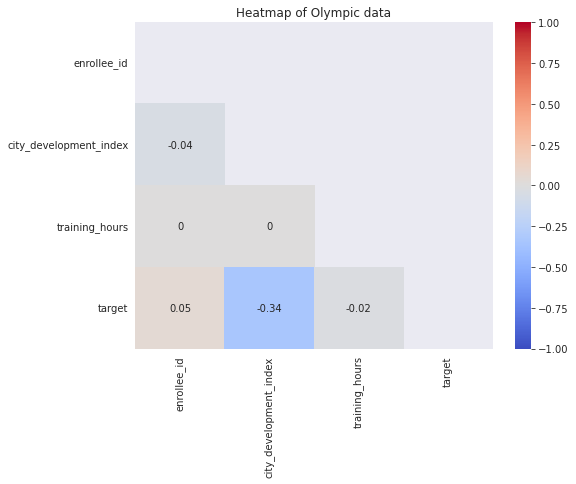

In [24]:
plt.figure(figsize=(8,6))

#O parâmetro mask faz com que o gráfico não fique espelhado, para facilitar a visualização:
corr = df.corr()
mask = mask = np.zeros_like(corr) 
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, vmax=1, vmin=-1, annot=np.round(corr.values, 2), cmap='coolwarm', mask=mask) 
plt.title("Heatmap of Olympic data")
plt.show()

Percebemos, então, que nenhuma feature numérica é relacionada diretamente à coluna target; no entanto, o índice de desenvolvimento da cidade apresenta, com maior relevância, uma relação indiretamente proporcional à target: isso ocorre, pois quanto maior o índice de desenvolvimento da cidade, menor é o valor da target e, como o valor da target é 0 (não deseja trocar de emprego) ou 1 (deseja trocar de emprego), isso reflete o fato dos candidatos dessas cidades não estarem buscando novos empregos, haja visto que já estão confortáveis em suas cidades e possuem melhores condições de vida.

Vale ressaltar que features como ID do candidato e código da cidade serão retirados para a construção dos modelos, já que não são importantes para as predições.

Podemos ver, então, a distribuição dos candidatos que buscam trocar de emprego, relacionando-os a seus gêneros:

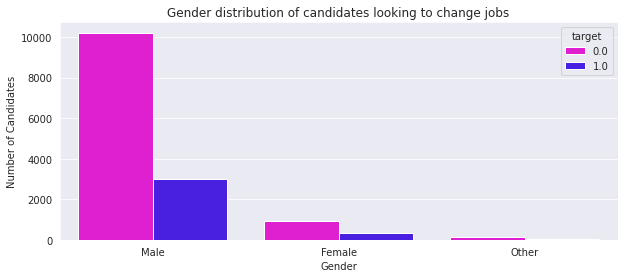

In [25]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'gender', data = df, hue = 'target')
plt.ylabel('Number of Candidates')
plt.xlabel('Gender')
plt.title('Gender distribution of candidates looking to change jobs')
plt.show()

Percebemos, então, que não há uma clara relação entre gênero e desejo de trocar emprego, já que a proporção dos valores da target entre os gêneros é bem similar.

Podemos, em seguida, analisar a influência da experiência relevante para a target:

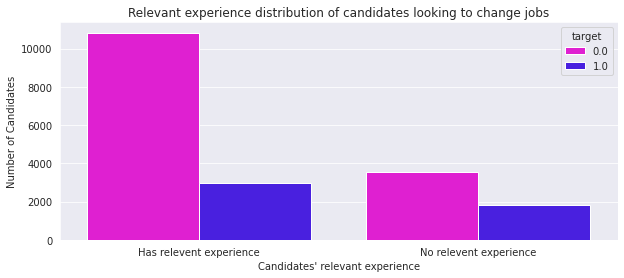

In [26]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'relevent_experience', data = df, hue = 'target')
plt.ylabel('Number of Candidates')
plt.xlabel("Candidates' relevant experience")
plt.title('Relevant experience distribution of candidates looking to change jobs')
plt.show()

Com isso, concluímos que candidatos com experiência relevante possuem um menor desejo de trocarem emprego proporcionalmente, quando comparados aos que não possuem experiência relevante, o que será de grande importância para as predições.

A nossa próxima análise será sobre a influência do tipo de curso universitário em que os candidatos são matriculados:

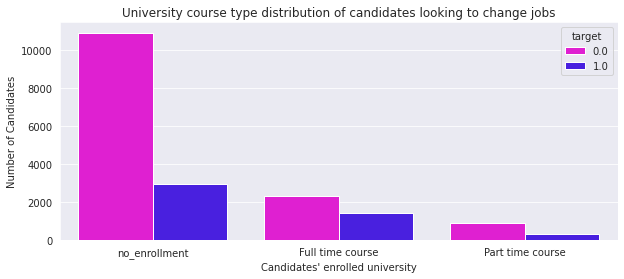

In [27]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'enrolled_university', data = df, hue = 'target')
plt.ylabel('Number of Candidates')
plt.xlabel("Candidates' enrolled university")
plt.title('University course type distribution of candidates looking to change jobs')
plt.show()

Percebemos, então, que, proporcionalmente, candidatos sem matrícula em curso universitário no momento estão mais propensos a não desejarem trocar de emprego. Uma justificativa para isso pode ser o fato de que os estudantes universitários não estejam conseguindo conciliar a vida profissional e a vida estudantil: isso é visto, principalmenente, nos matriculados em curso de período integral, em que parte expressante deseja trocar de emprego.

O próximo gráfico dirá respeito à influência do nível de educação dos candidatos:

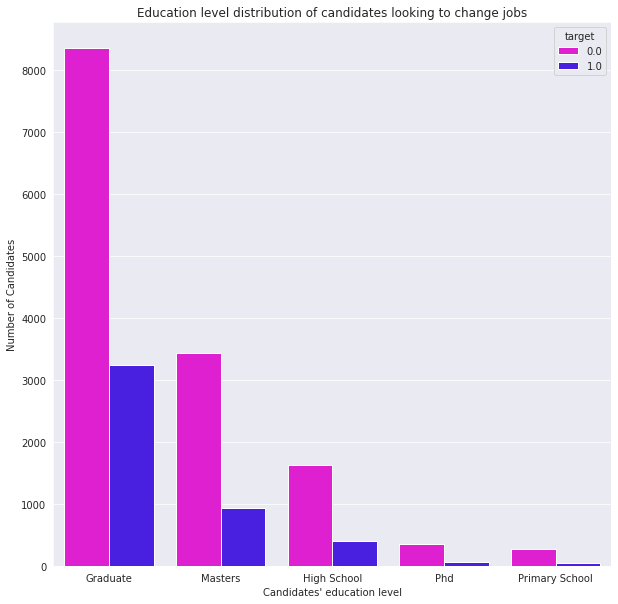

In [36]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'education_level', data = df, hue = 'target')
plt.ylabel('Number of Candidates')
plt.xlabel("Candidates' education level")
plt.title('Education level distribution of candidates looking to change jobs')
plt.show()

Por mais que não possamos tirar grandes conclusões deste gráfico, percebemos que a proporção de mestres que desejam trocar de emprego é menor do que a de graduados; isso pode ocorrer pois já tem maior chance de estarem em uma posição que almejaram no trabalho.

Podemos verificar, também, a influência da grande área dos candidatos em relação à target:

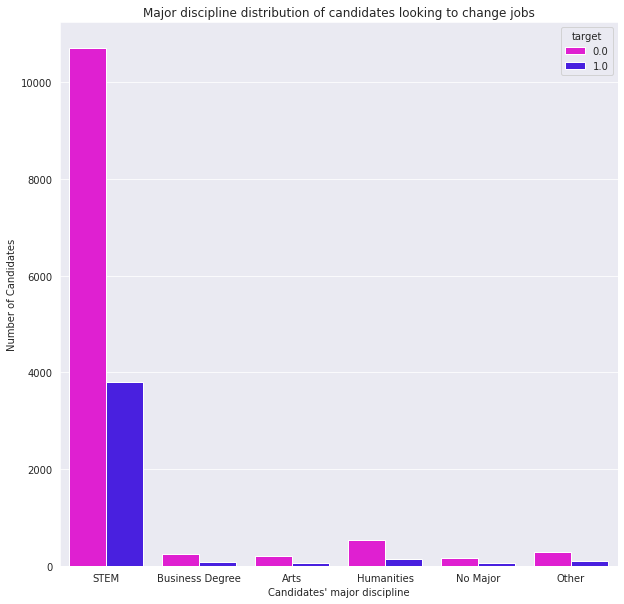

In [37]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'major_discipline', data = df, hue = 'target')
plt.ylabel('Number of Candidates')
plt.xlabel("Candidates' major discipline")
plt.title('Major discipline distribution of candidates looking to change jobs')
plt.show()

Devido à grande quantidade de candidatos da área STEM, não conseguimos tirar relevantes análises.

Podemos, então, passar para a influência na target da experiência de cada candidato:

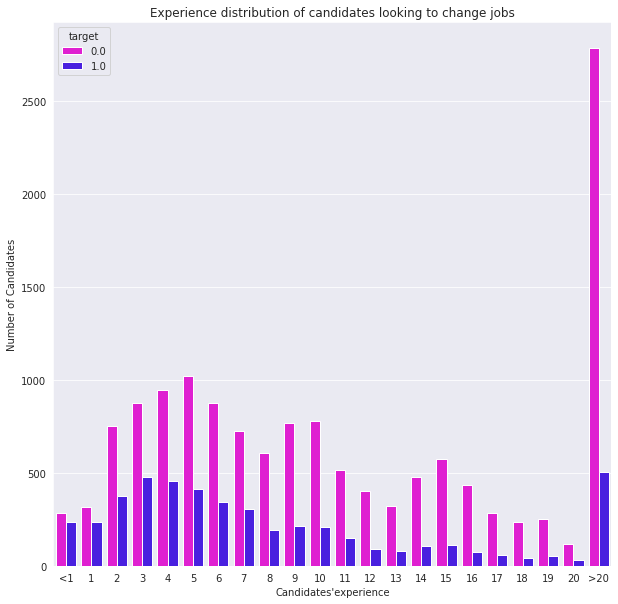

In [39]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'experience', data = df, hue = 'target', order = ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20'])
plt.ylabel('Number of Candidates')
plt.xlabel("Candidates'experience")
plt.title('Experience distribution of candidates looking to change jobs')
plt.show()

Percebemos que, quanto menor a experiência dos candidatos, maior é a probalidade de eles quererem trocar de emprego. Isso diz respeito ao fato de que podem ser candidatos que ainda não se encontraram no nicho em que desejam trabalhar, ou que não desejam continuar na profissão. Por outro lado, candidatos com mais anos de experiência tendem a ter uma carreira consolidada, a qual não seria tão vantajoso de abandonar.

A próxima análise a ser feita será sobre a influência do tamanho da companhia dos candidatos:

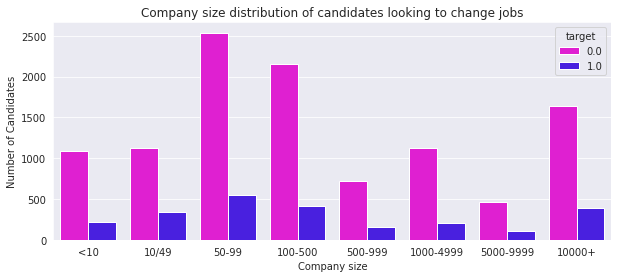

In [41]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'company_size', data = df, hue = 'target', order = ['<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+'])
plt.ylabel('Number of Candidates')
plt.xlabel('Company size')
plt.title('Company size distribution of candidates looking to change jobs')
plt.show()

Com esses dados, não conseguimos tirar nenhuma análise relevante, pois sua distribuição é arbitrária.

A próxima análise a ser feita será sobre a influência do tipo da companhia em que os candidatos estão:

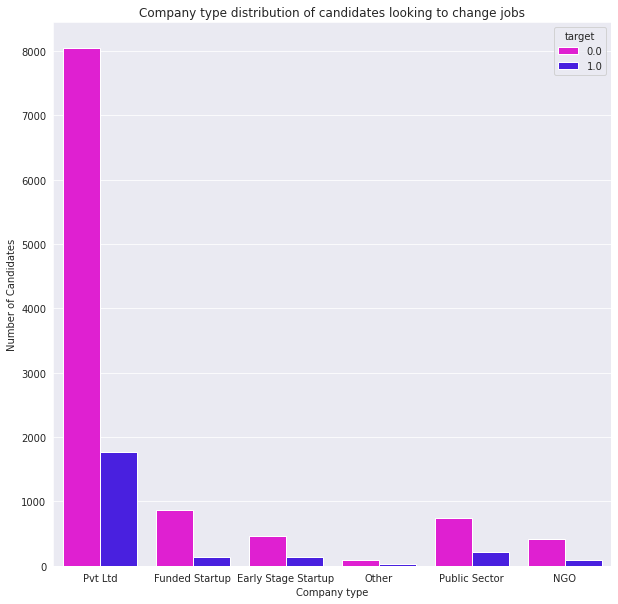

In [42]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'company_type', data = df, hue = 'target')
plt.ylabel('Number of Candidates')
plt.xlabel('Company type')
plt.title('Company type distribution of candidates looking to change jobs')
plt.show()

Com este gráfico, também não conseguimos chegar a alguma análise relevante de forma rápida.

Podemos, então, tentar uma última análise, que retrata a influência da diferença de anos entre o emprego anterior e o atual dos candidatos:

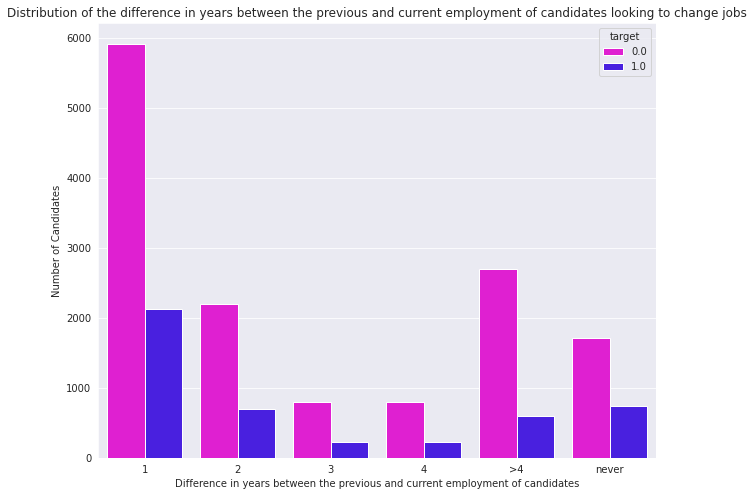

In [47]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'last_new_job', data = df, hue = 'target', order = ['1', '2', '3', '4', '>4', 'never'])
plt.ylabel('Number of Candidates')
plt.xlabel('Difference in years between the previous and current employment of candidates')
plt.title('Distribution of the difference in years between the previous and current employment of candidates looking to change jobs')
plt.show()

Com isso, não podemos chegar a muitos pontos com a análise, mas pode-se observar que a proporção de candidatos com mais de quatro anos de diferença entre o emprego anterior e o atual que desejam trocar de emprego é menor do que os com poucos anos de diferença e também dos que nunca trocaram de emprego: isso retrata o fato de essa faixa representar funcionários que já estão há um tempo considerável na sua companhia e, portanto, tentdem a se sentir mais confortáveis com seus empregos.

## Ajustes finais no dataset antes das predições

In [34]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [35]:
df.drop(['enrollee_id', 'city'], axis=1, inplace=True)

# 6. Conclusões das análises